In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Load Data

In [2]:
loans = pd.read_csv('loan_default.csv')
loans.head(3)

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio   Education  \
0               4         15.23        36      0.44  Bachelor's   
1               1          4.81        60      0.68    Master's   
2               3         21.17        24      0.31    Master's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1

'Do the column names correspond to what those columns store?' `LoanID`: the 'unique identifier for each loan.' `Age`: the 'age of the borrower.' `Income`: the 'annual income of the borrower.' `LoanAmount`: the 'amount of money being borrowed.' `CreditScore`: the 'credit score of the borrower.' `MonthsEmployed`: the 'number of months the borrower has been employed.' `NumCreditLines`: the 'number of credit lines the borrower has open.' `InterestRate`: the 'interest rate for the loan.' `LoanTerm`: the 'term length of the loan in months.' `DTIRatio`: the 'Debt-to-Income ratio.' `Education`: the 'highest level of education attained by the borrower.' `EmploymentType`: the 'type of employment status of the borrower.' `MaritalStatus`: the 'marital status of the borrower.' `HasMortgage`: 'whether the borrower has a mortgage.' `HasDependents`: 'whether the borrower has dependents.' `LoanPurpose`: the 'purpose of the loan.' `HasCoSigner`: 'whether the loan has a co-signer.' `Default`: 'whether the loan defaulted or not.'

In [3]:
# We will need a dataframe without the 'LoanID' column.
ids = pd.DataFrame(loans.LoanID)
df = loans.drop('LoanID', axis=1)
ids.head(2)

LoanID
0  I38PQUQS96
1  HPSK72WA7R

In [4]:
df.shape

(255347, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [6]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

# Single Feature Analysis

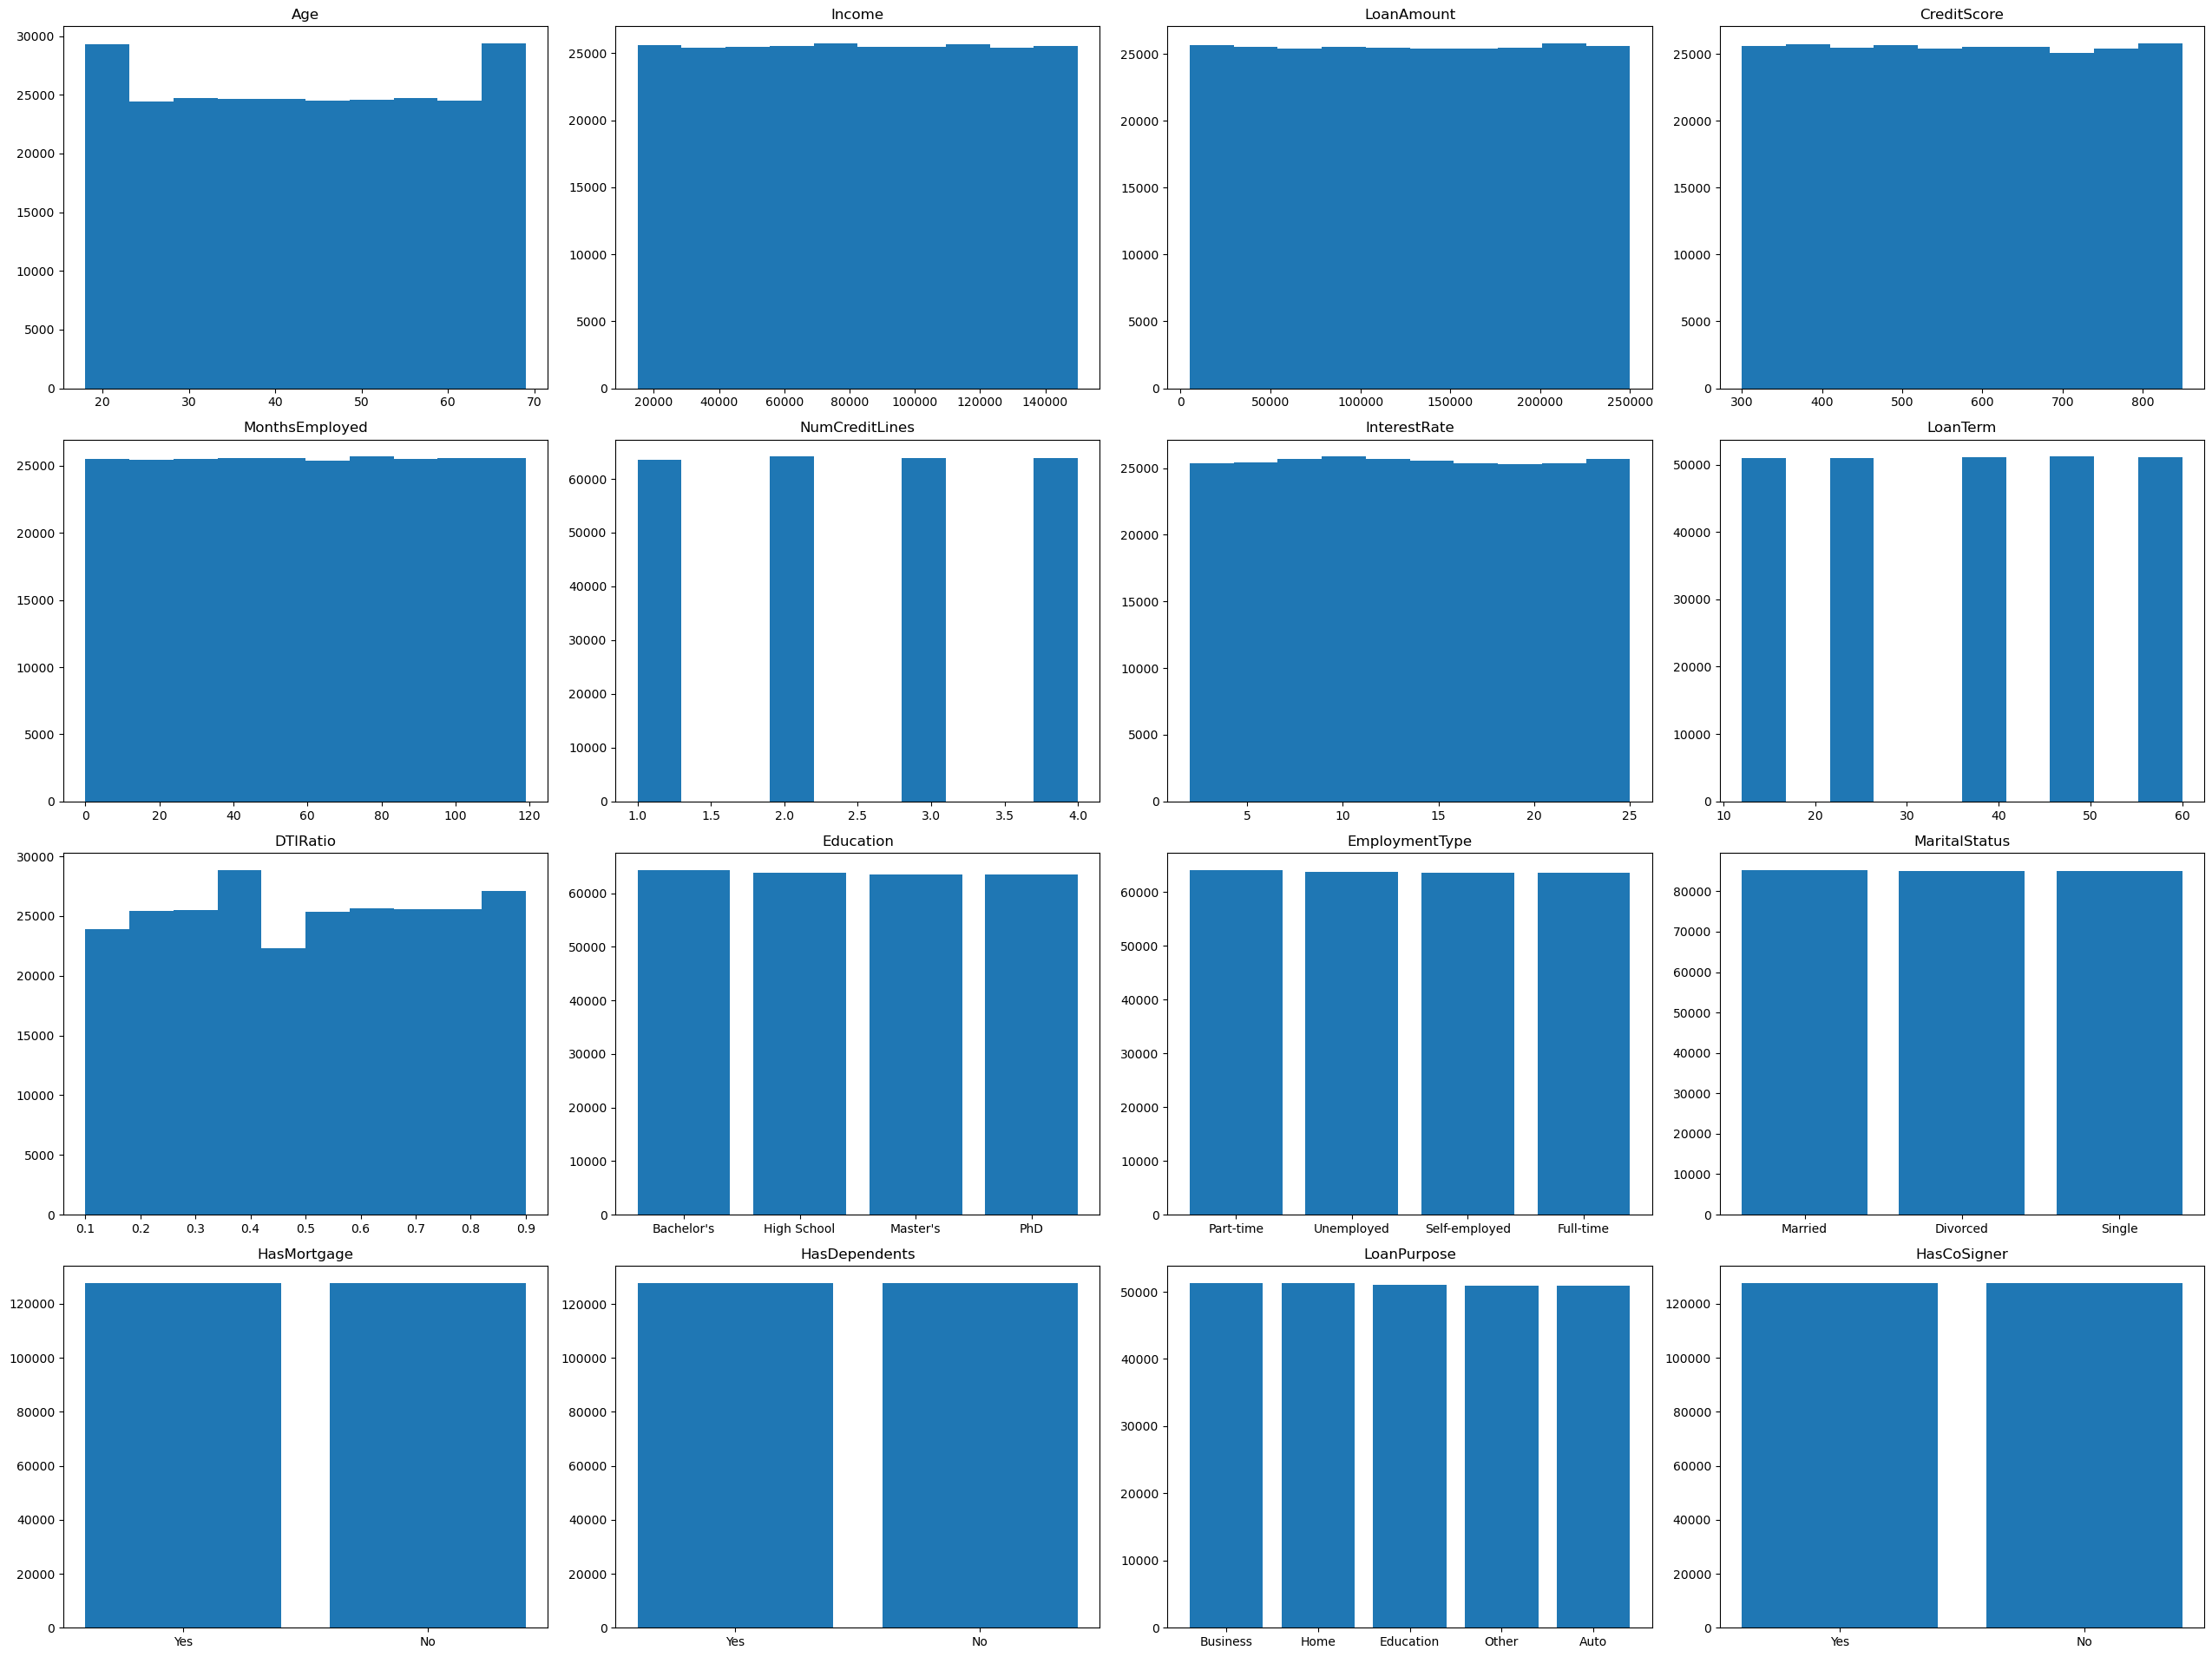

In [7]:
cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 
        'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25.6, 19.2))
i_ax = axs.flat
for col in cols:
    ax = next(i_ax)
    ax.set_title(col)
    if col in num_cols:
        ax.hist(df[col])
    elif col in cat_cols:
        class_counts = df[col].value_counts()
        ax.bar(class_counts.index, class_counts)
#fig.delaxes(axs[5, 2])
plt.tight_layout()
plt.show()

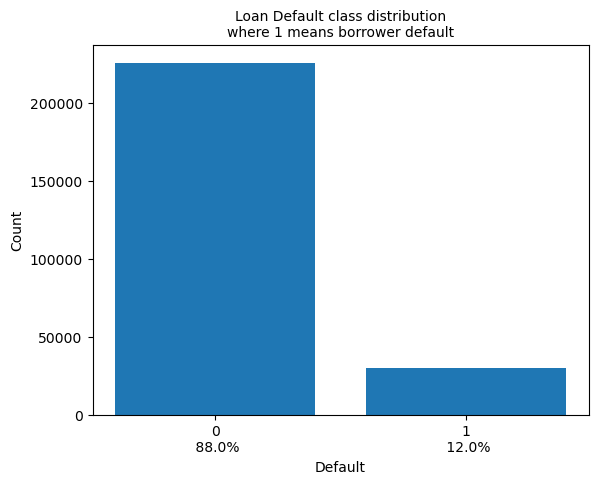

In [8]:
default_counts = loans['Default'].value_counts()
default_percentages = pd.Series([(x / loans.shape[0]) * 100.00 for x in default_counts])

fig, ax = plt.subplots()
ax.bar(default_counts.index, default_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(default_percentages.index.astype(str) + '\n' + ' ' +
                   default_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Default')
ax.set_title('Loan Default class distribution\nwhere 1 means borrower default', fontsize = 10)
plt.show()

We created two dataframes to anticipate future numeric and categorical modeling. We prepared the first dataframe for categorical modeling. By converting categorical features into numeric features, we made it possible to use a logistic regression on our data. We readied our second dataframe for linear regressions by simply removing all the categorical features. 

In [9]:
dflog = pd.get_dummies(df, columns = cat_cols, dtype=int)
dflin = df.drop(cat_cols, axis=1)

In [10]:
loans_description = dflog.describe(include='all').T
loans_description['range'] = loans_description['max'] - loans_description['min']
loans_description

count           mean           std      min  \
Age                           255347.0      43.498306     14.990258     18.0   
Income                        255347.0   82499.304597  38963.013729  15000.0   
LoanAmount                    255347.0  127578.865512  70840.706142   5000.0   
CreditScore                   255347.0     574.264346    158.903867    300.0   
MonthsEmployed                255347.0      59.541976     34.643376      0.0   
NumCreditLines                255347.0       2.501036      1.117018      1.0   
InterestRate                  255347.0      13.492773      6.636443      2.0   
LoanTerm                      255347.0      36.025894     16.969330     12.0   
DTIRatio                      255347.0       0.500212      0.230917      0.1   
Default                       255347.0       0.116128      0.320379      0.0   
Education_Bachelor's          255347.0       0.252073      0.434204      0.0   
Education_High School         255347.0       0.250259      0.433163      0.0   
Education_Master's            255347.0       0.248842      0.432343      0.0   
Education_PhD                 255347.0       0.248826      0.432334      0.0   
EmploymentType_Full-time      255347.0       0.249292      0.432604      0.0   
EmploymentType_Part-time      255347.0       0.251270      0.433744      0.0   
EmploymentType_Self-employed  255347.0       0.249488      0.432718      0.0   
EmploymentType_Unemployed     255347.0       0.249950      0.432985      0.0   
MaritalStatus_Divorced        255347.0       0.333010      0.471291      0.0   
MaritalStatus_Married         255347.0       0.334063      0.471663      0.0   
MaritalStatus_Single          255347.0       0.332927      0.471262      0.0   
HasMortgage_No                255347.0       0.499986      0.500001      0.0   
HasMortgage_Yes               255347.0       0.500014      0.500001      0.0   
HasDependents_No              255347.0       0.499732      0.500001      0.0   
HasDependents_Yes             255347.0       0.500268      0.500001      0.0   
LoanPurpose_Auto              255347.0       0.199117      0.399337      0.0   
LoanPurpose_Business          255347.0       0.200895      0.400671      0.0   
LoanPurpose_Education         255347.0       0.199748      0.399812      0.0   
LoanPurpose_Home              255347.0       0.200848      0.400636      0.0   
LoanPurpose_Other             255347.0       0.199391      0.399544      0.0   
HasCoSigner_No                255347.0       0.499892      0.500001      0.0   
HasCoSigner_Yes               255347.0       0.500108      0.500001      0.0   

                                   25%        50%        75%       max  \
Age                              31.00      43.00      56.00      69.0   
Income                        48825.50   82466.00  116219.00  149999.0   
LoanAmount                    66156.00  127556.00  188985.00  249999.0   
CreditScore                     437.00     574.00     712.00     849.0   
MonthsEmployed                   30.00      60.00      90.00     119.0   
NumCreditLines                    2.00       2.00       3.00       4.0   
InterestRate                      7.77      13.46      19.25      25.0   
LoanTerm                         24.00      36.00      48.00      60.0   
DTIRatio                          0.30       0.50       0.70       0.9   
Default                           0.00       0.00       0.00       1.0   
Education_Bachelor's              0.00       0.00       1.00       1.0   
Education_High School             0.00       0.00       1.00       1.0   
Education_Master's                0.00       0.00       0.00       1.0   
Education_PhD                     0.00       0.00       0.00       1.0   
EmploymentType_Full-time          0.00       0.00       0.00       1.0   
EmploymentType_Part-time          0.00       0.00       1.00       1.0   
EmploymentType_Self-employed      0.00       0.00       0.00       1.0   
EmploymentType_Unemployed         0.00       0.00       0.00

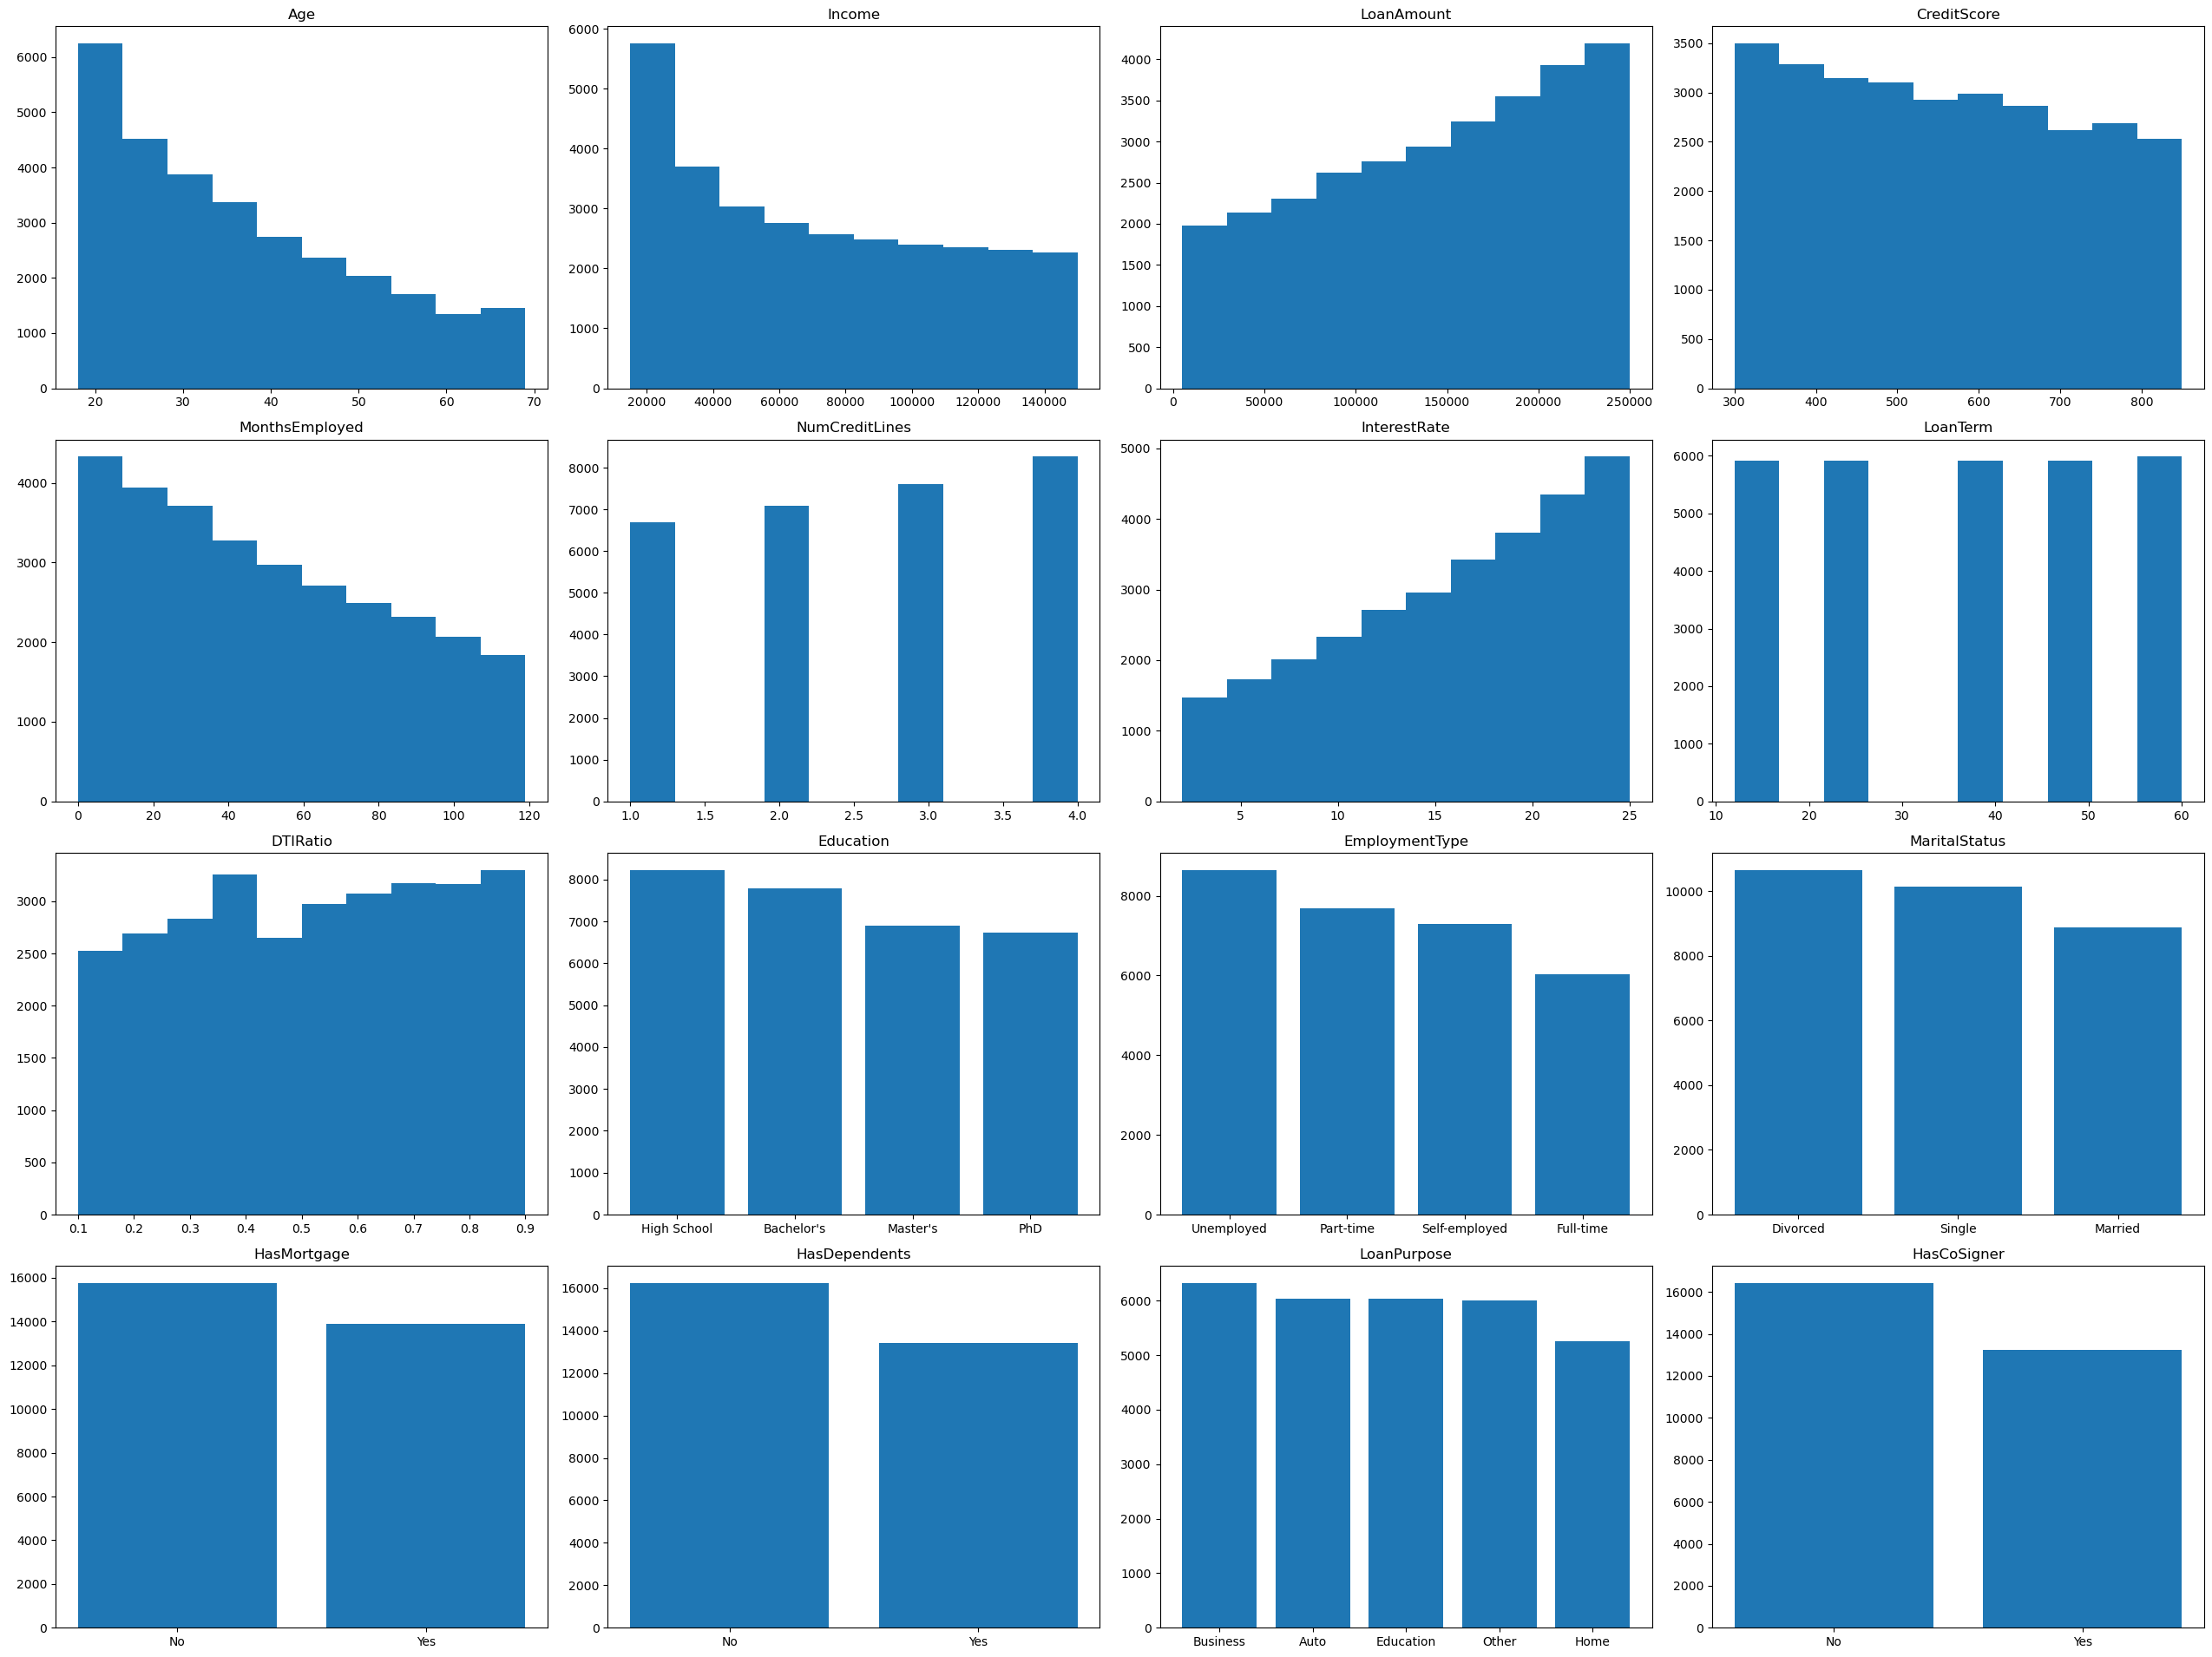

In [11]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25.6, 19.2))
i_ax = axs.flat
for col in cols:
    ax = next(i_ax)
    ax.set_title(col)
    if col in num_cols:
        ax.hist(df[df['Default'] == 1][col])
    elif col in cat_cols:
        class_counts = df[df['Default'] == 1][col].value_counts()
        ax.bar(class_counts.index, class_counts)
#fig.delaxes(axs[5, 2])
plt.tight_layout()
plt.show()

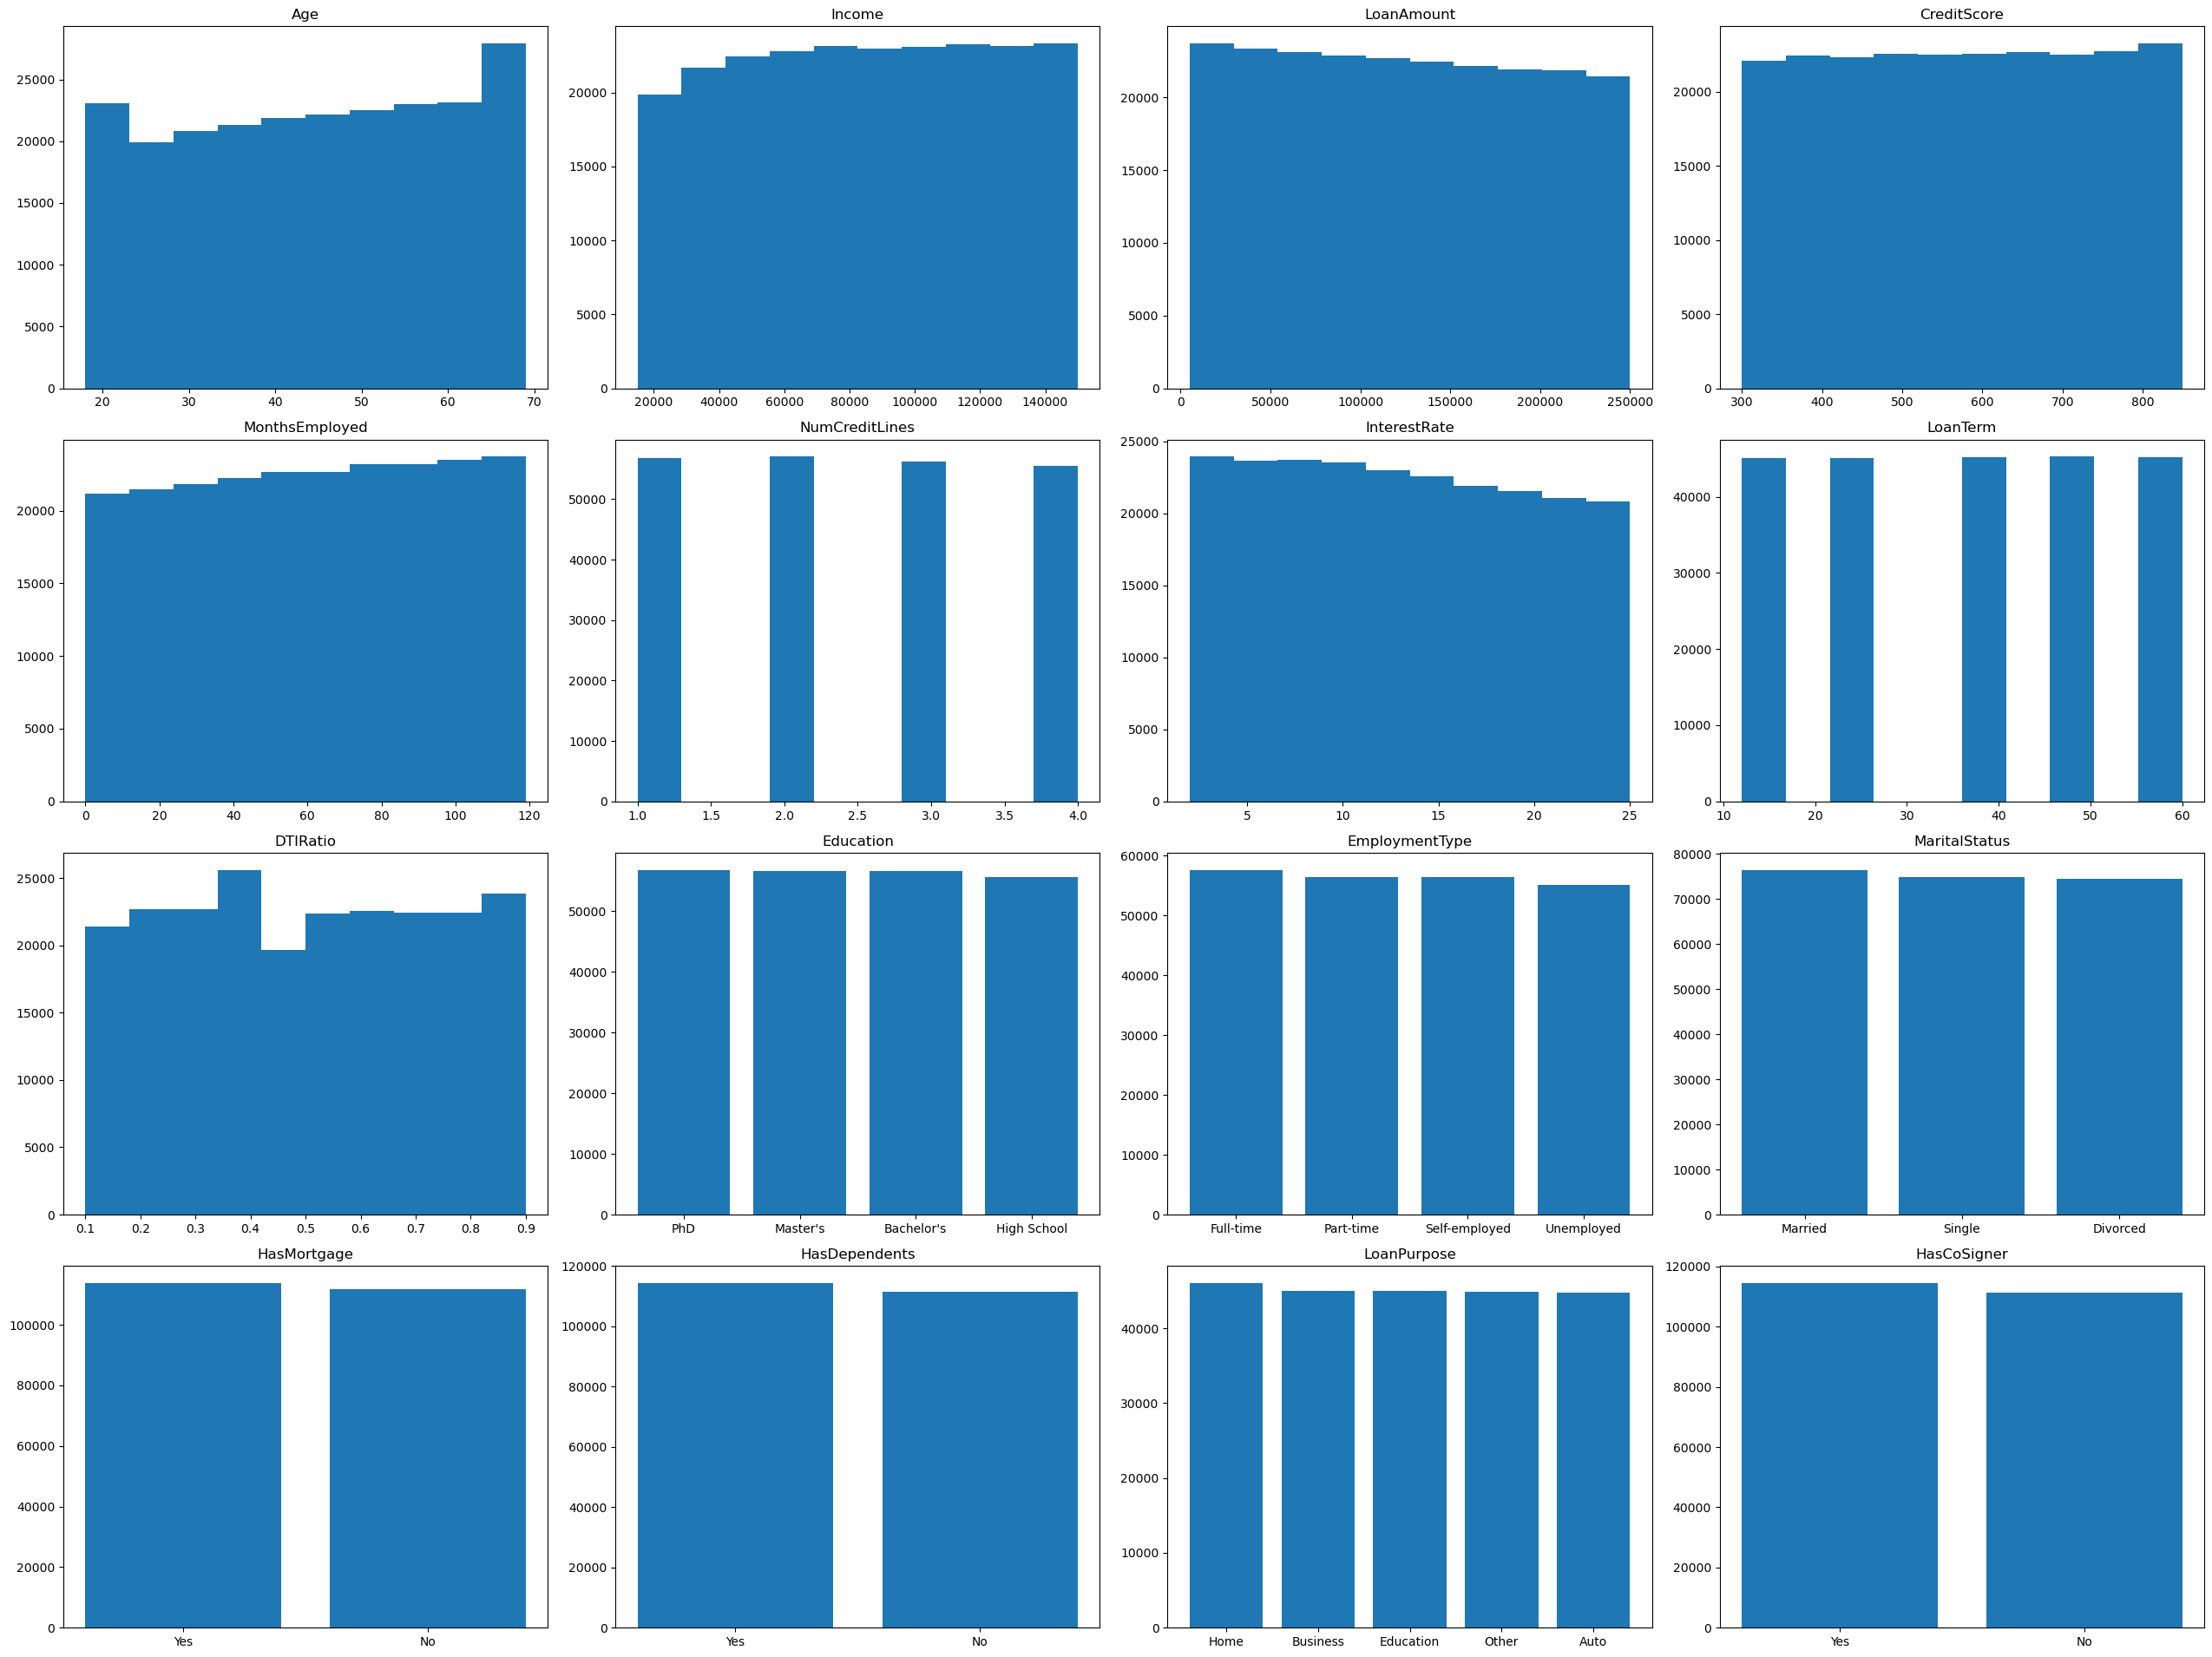

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25.6, 19.2))
i_ax = axs.flat
for col in cols:
    ax = next(i_ax)
    ax.set_title(col)
    if col in num_cols:
        ax.hist(df[df['Default'] == 0][col])
    elif col in cat_cols:
        class_counts = df[df['Default'] == 0][col].value_counts()
        ax.bar(class_counts.index, class_counts)
#fig.delaxes(axs[5, 2])
plt.tight_layout()
plt.show()

# Multiple Feature Analysis

In [13]:
dflin.corr()

Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Default        -0.167783 -0.099119    0.086659    -0.034166       -0.097374   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio   Default  
Age                  -0.000890     -0.001127  0.000263 -0.004689 -0.167783  
Income               -0.002016     -0.002303 -0.000998  0.000205 -0.099119  
LoanAmount            0.000794     -0.002291  0.002538  0.001122  0.086659  
CreditScore           0.000016      0.000436  0.001130 -0.001039 -0.034166  
MonthsEmployed        0.001267      0.000096 -0.001166  0.001765 -0.097374  
NumCreditLines        1.000000     -0.000297 -0.000226 -0.000586  0.028330  
InterestRate         -0.000297      1.000000  0.000892  0.000575  0.131273  
LoanTerm             -0.000226      0.000892  1.000000  0.002273  0.000545  
DTIRatio             -0.000586      0.000575  0.002273  1.000000  0.019236  
Default               0.028330      0.131273  0.000545  0.019236  1.000000

<Axes: >

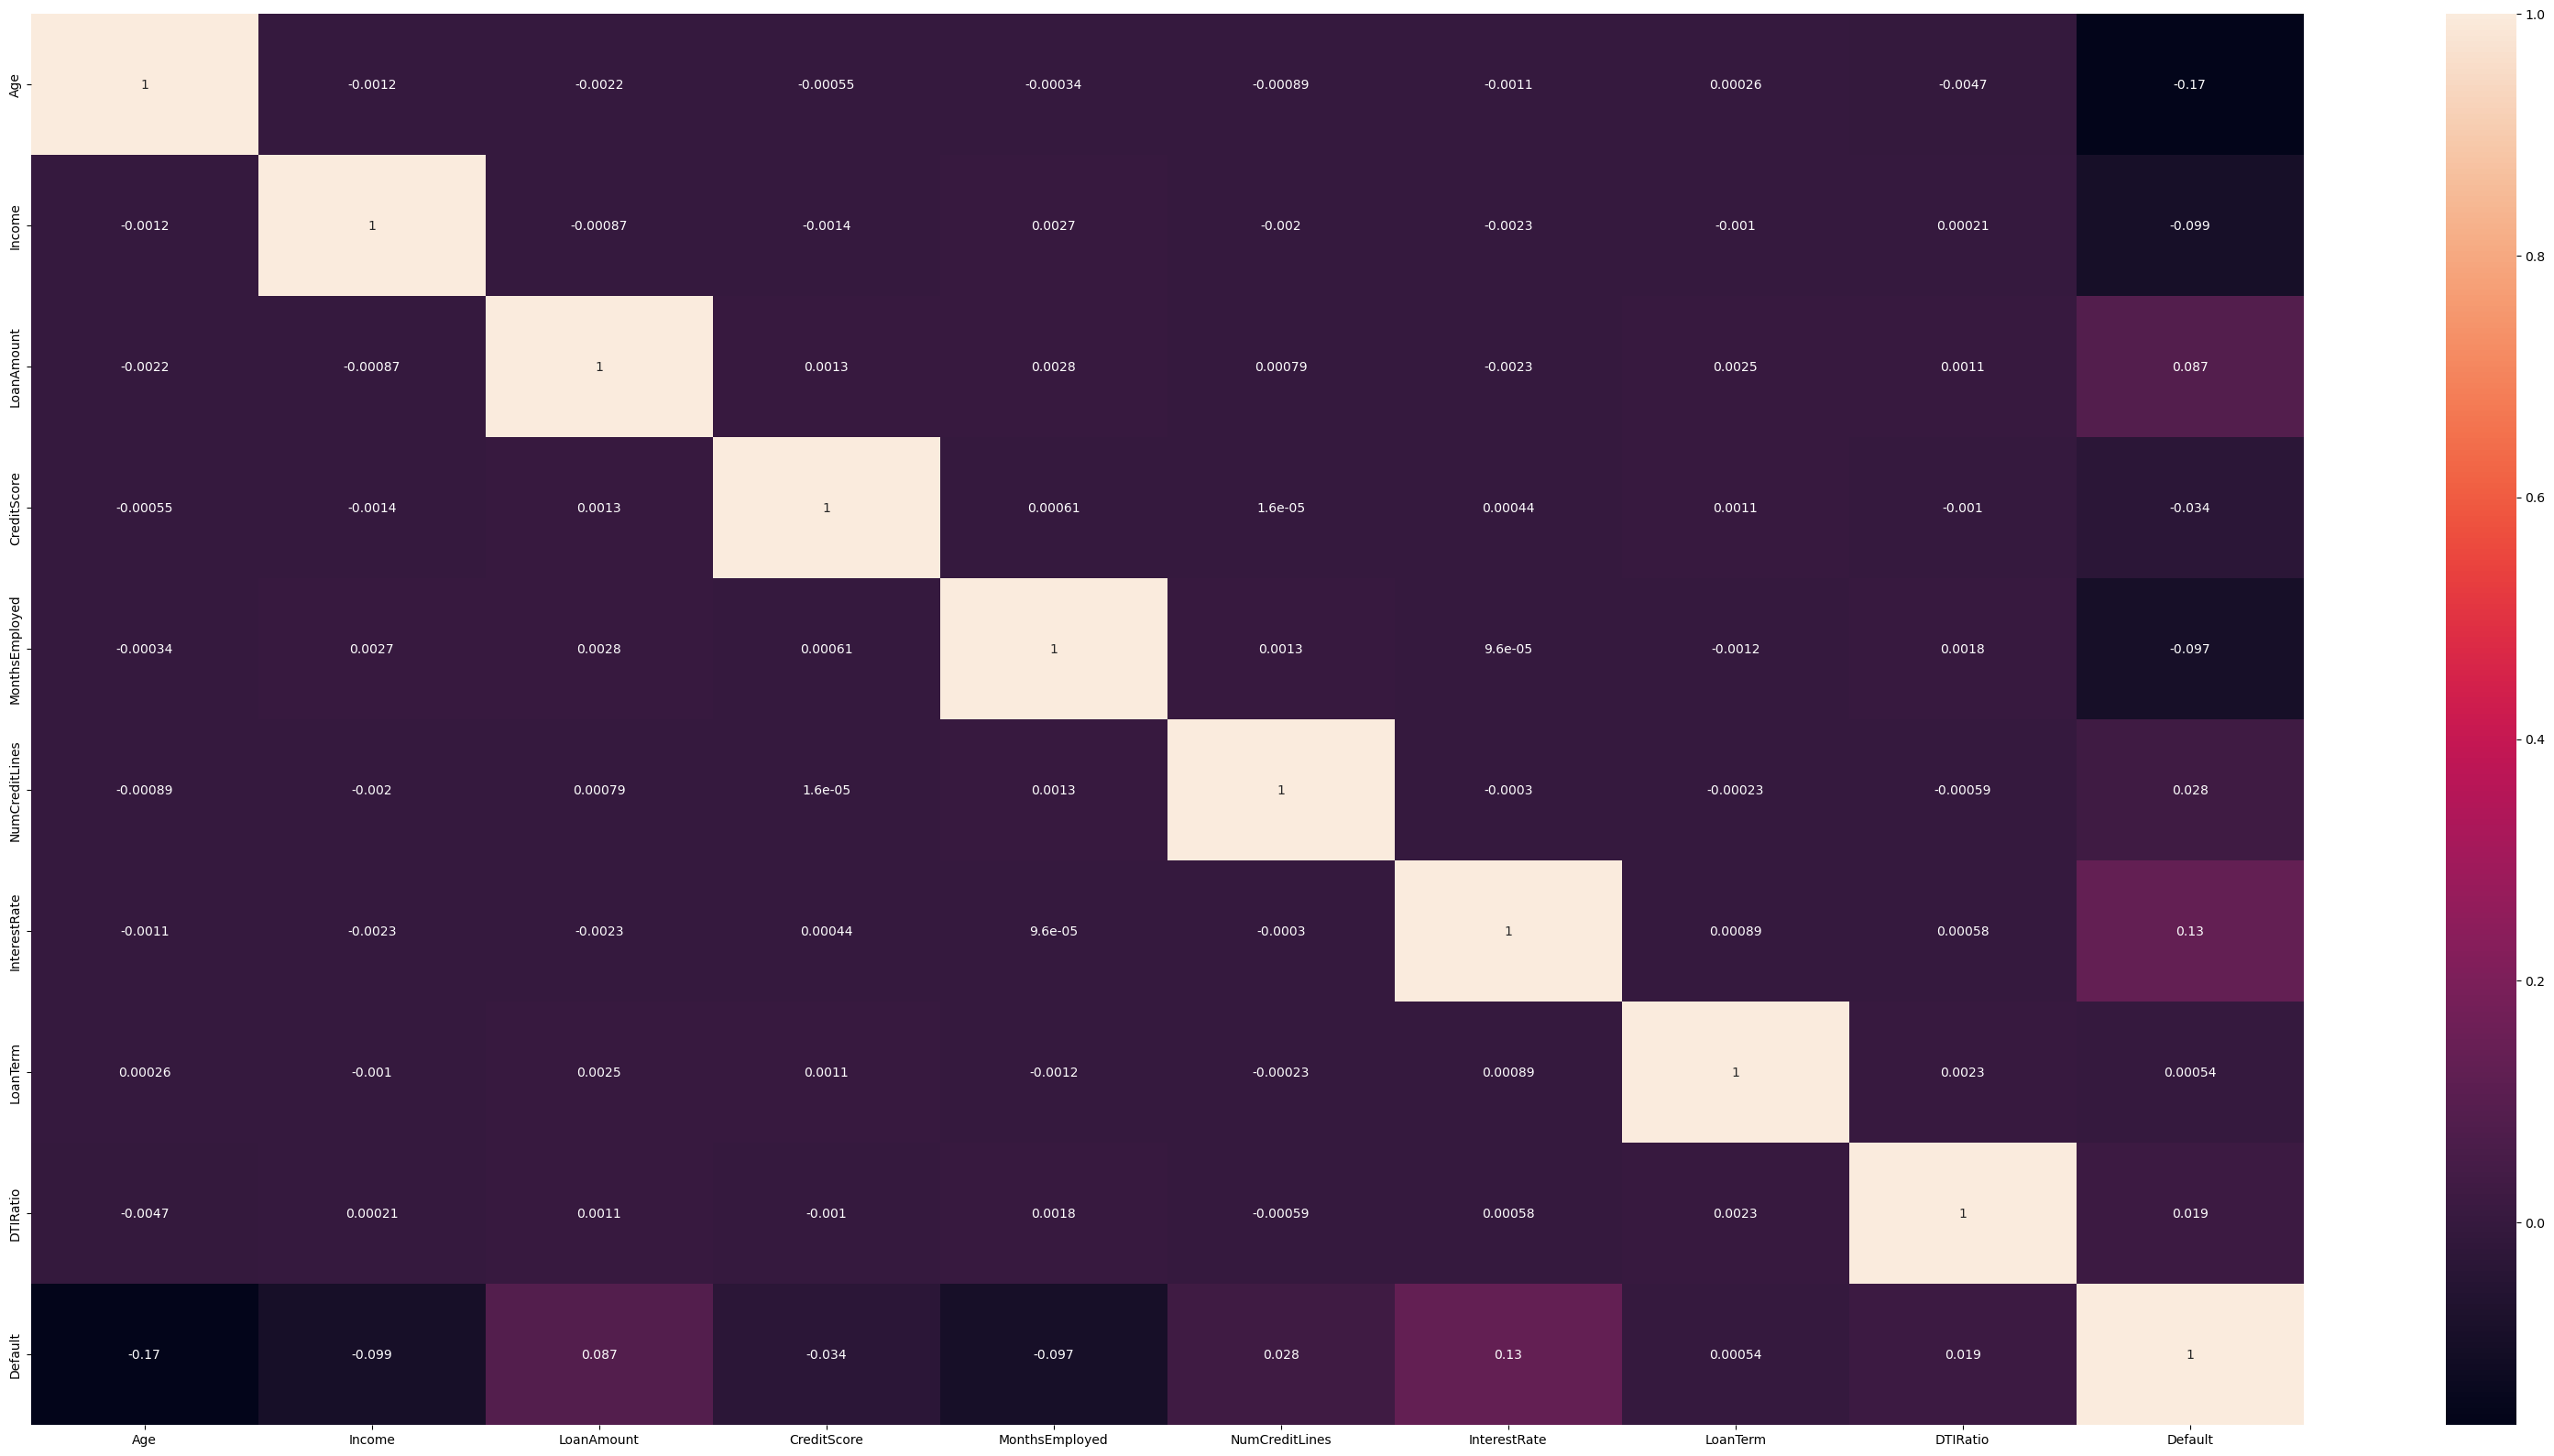

In [14]:
plt.figure(figsize=(40,20))
sns.heatmap(dflin.corr(), annot=True)

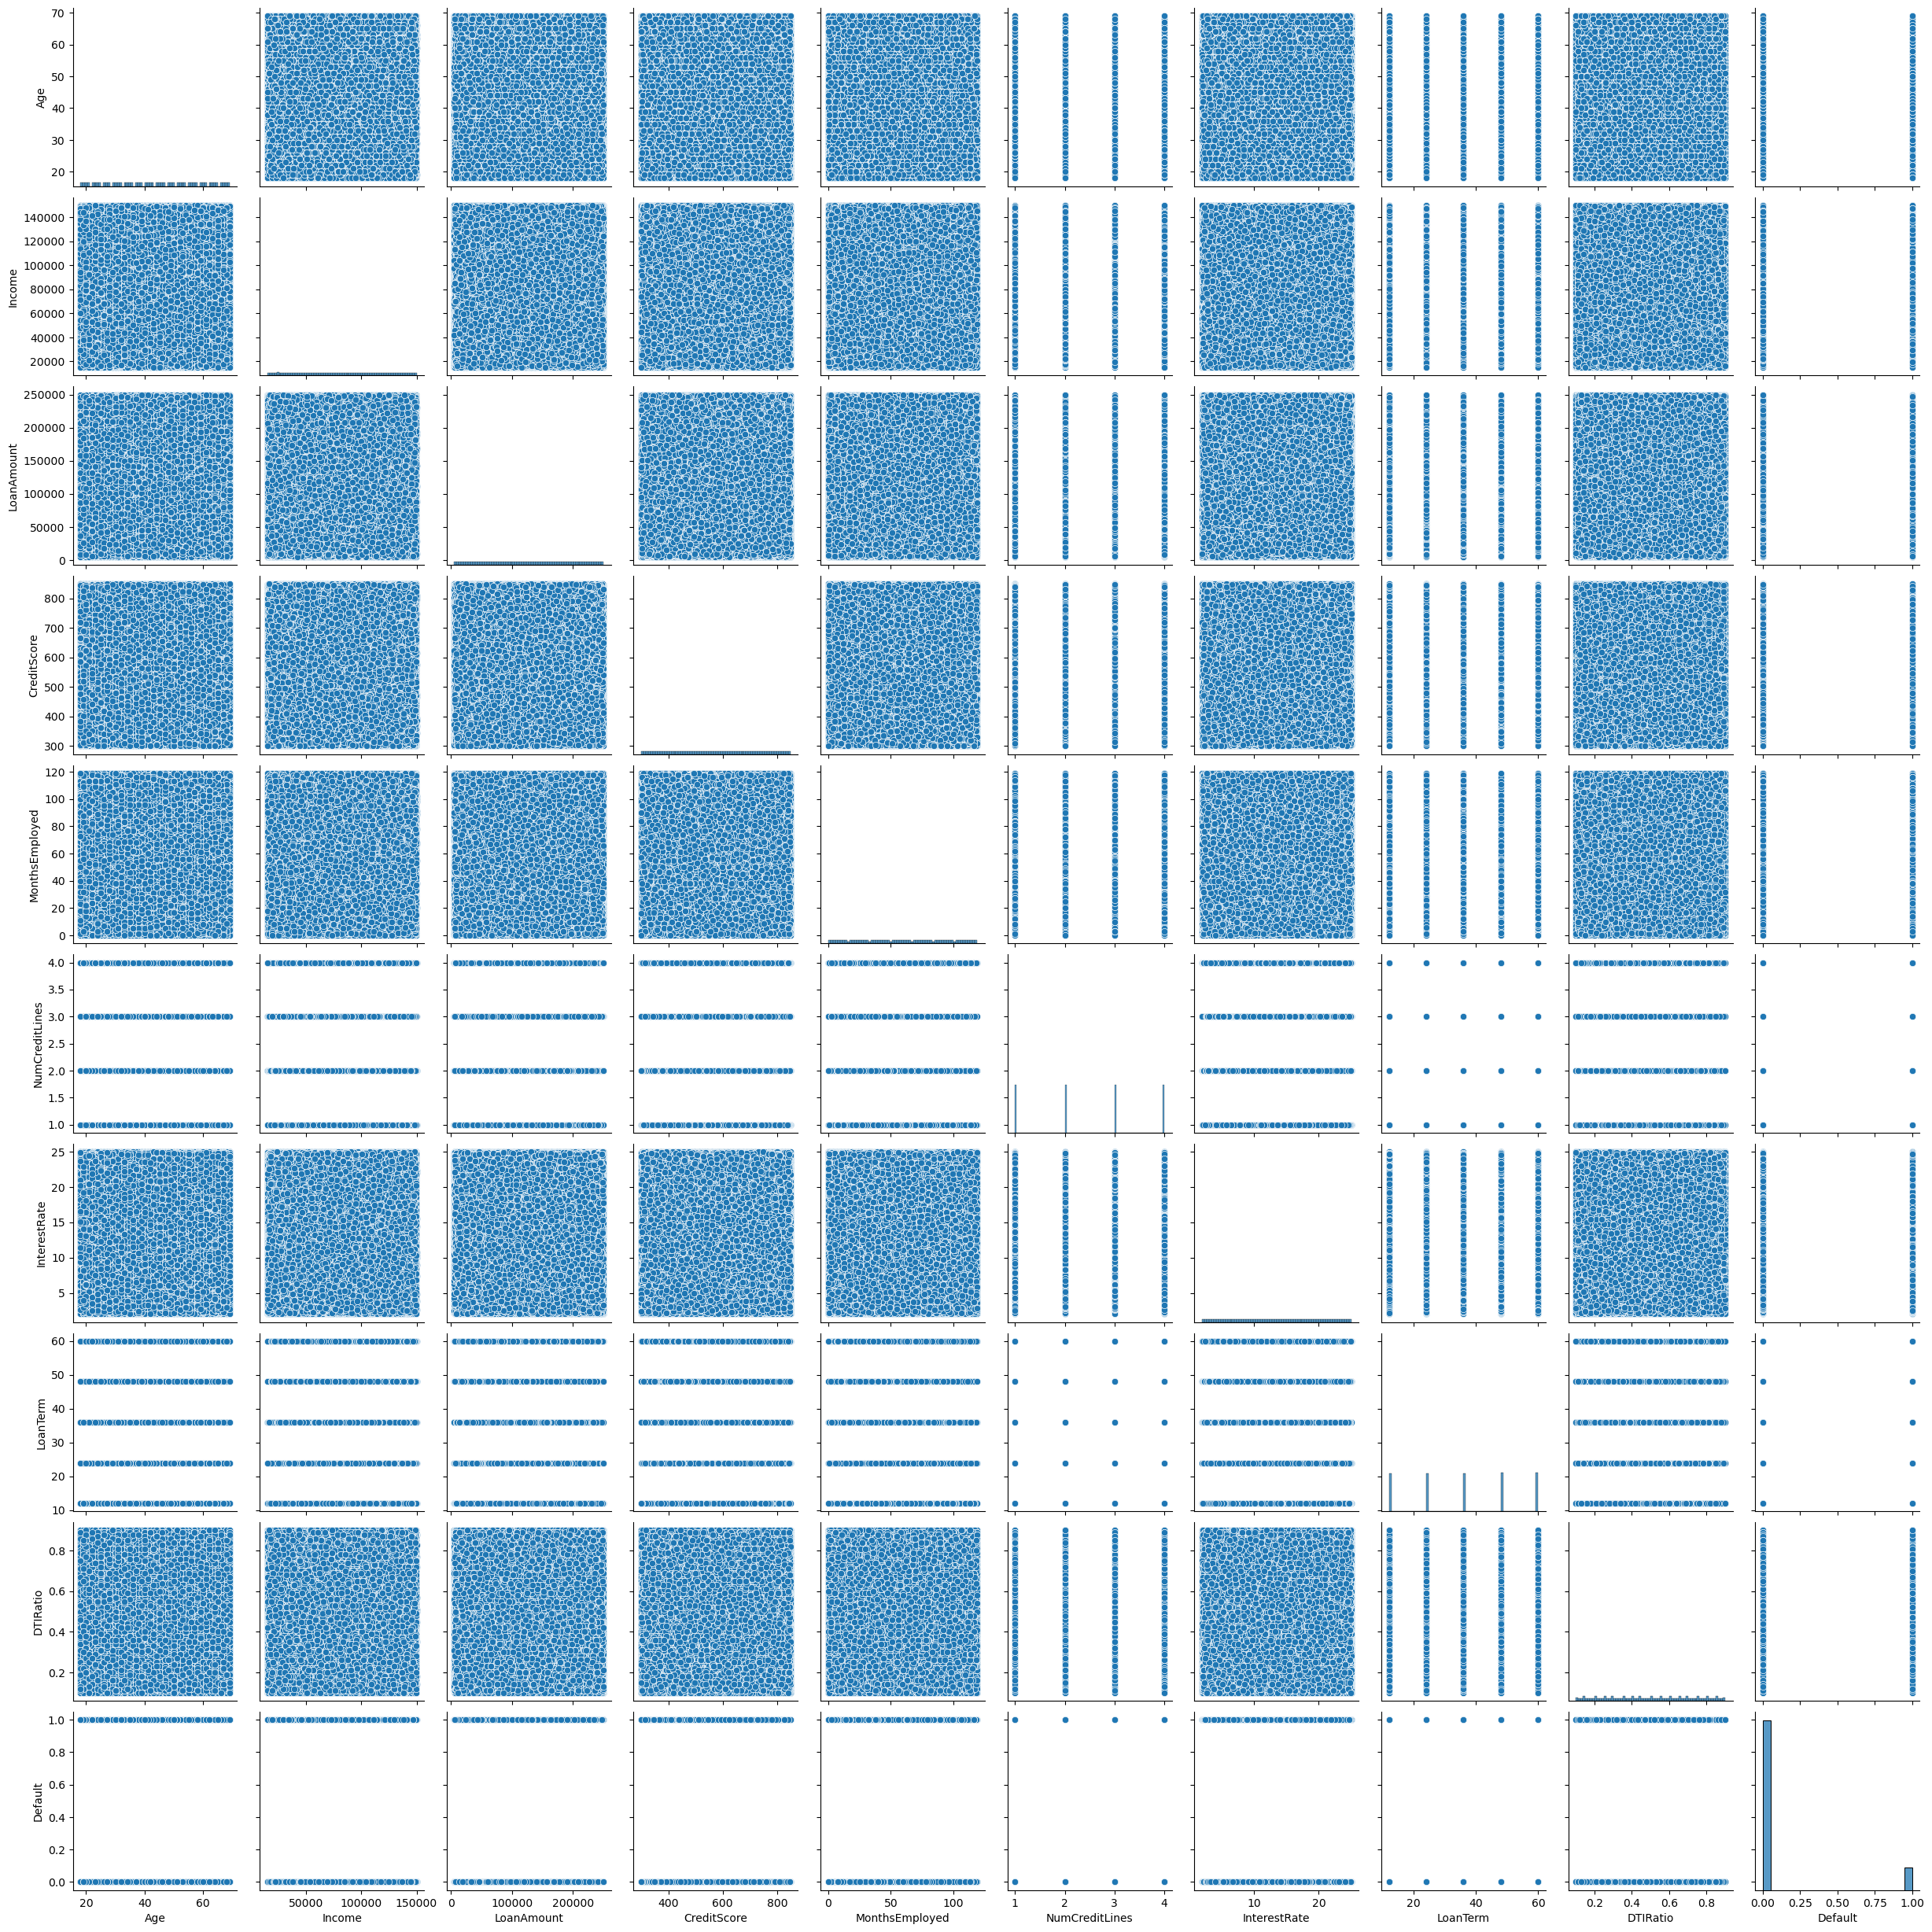

In [15]:
sns.pairplot(dflin)

The numeric features seem quite independent of each other. 

# PCA

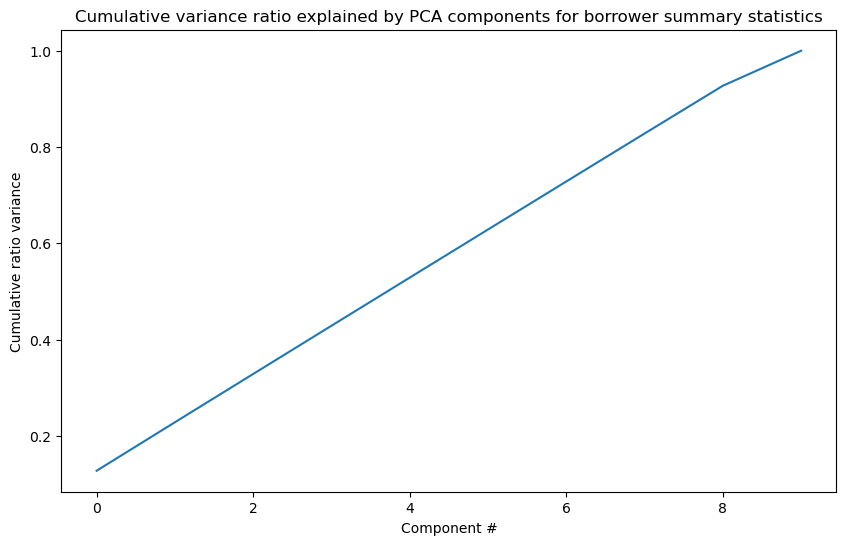

In [16]:
dflin_scaled = scale(dflin)
dflin_pca = PCA().fit(dflin_scaled)
plt.subplots(figsize=(10, 6))
plt.plot(dflin_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for borrower summary statistics');